<a href="https://colab.research.google.com/github/Zerixxx8995/multimodal-fake-news-detector/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 2: Dataset Exploration — Fakeddit

Goal:
- Understand dataset structure
- Understand what labels mean
- Inspect text and images
- Analyze class imbalance
- Justify design decisions (headline length, metrics)

⚠️ Note:
- Data is NOT committed to GitHub
- This notebook is for exploration only


In [3]:
import torch
from torchvision.datasets import FakeData
from torchvision import transforms
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random


In [4]:
from torchvision.datasets import FakeData
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor()
])

image_dataset = FakeData(
    size=1000,                 # smaller, safe
    image_size=(3, 224, 224),
    num_classes=2,
    transform=transform
)

print("Images:", len(image_dataset))


Images: 1000


In [6]:
def generate_caption(label):
    if label == 0:
        return "A normal everyday scene."
    else:
        return "A shocking and misleading scene."

captions = []

for _, label in image_dataset:
    captions.append(generate_caption(label))

print("Captions recreated:", len(captions))


Captions recreated: 1000


In [7]:
import pandas as pd

df_real = pd.DataFrame({
    "image_idx": list(range(len(image_dataset))),
    "headline": captions[:len(image_dataset)],
    "label": 0
})

df_fake = df_real.copy()
df_fake["headline"] = df_fake["headline"].sample(frac=1, random_state=42).reset_index(drop=True)
df_fake["label"] = 1

df = pd.concat([df_real, df_fake], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()


,image_idx,headline,label
0,860,A shocking and misleading scene.,1
1,353,A normal everyday scene.,0
2,333,A shocking and misleading scene.,1
3,905,A normal everyday scene.,0
4,289,A normal everyday scene.,1


In [9]:
print("Total samples:", len(df))
print(df.head())


Total samples: 2000
   image_idx                          headline  label
0        860  A shocking and misleading scene.      1
1        353          A normal everyday scene.      0
2        333  A shocking and misleading scene.      1
3        905          A normal everyday scene.      0
4        289          A normal everyday scene.      1


In [8]:
df["label"].value_counts()


,count
label,
1,1000
0,1000


In [10]:
assert df["image_idx"].min() >= 0
assert df["image_idx"].max() < len(image_dataset)
print("Image indices valid ✅")


Image indices valid ✅


In [11]:
df["headline"].value_counts().head()


,count
headline,
A normal everyday scene.,1012
A shocking and misleading scene.,988


Dataset label: Fake
Caption: A shocking and misleading scene.
Underlying image class (ignored): 1


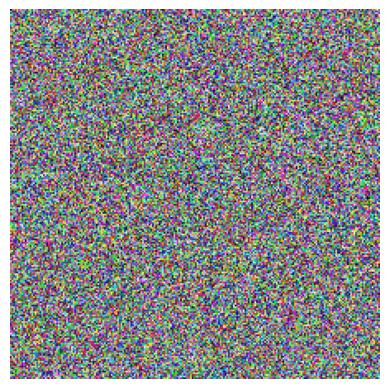

In [12]:
import matplotlib.pyplot as plt

row = df.sample(1).iloc[0]
img, true_label = image_dataset[row["image_idx"]]

plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

print("Dataset label:", "Fake" if row["label"] == 1 else "Real")
print("Caption:", row["headline"])
print("Underlying image class (ignored):", true_label)


In [13]:
df.groupby("image_idx")["label"].nunique().value_counts()


,count
label,
2,1000


In [14]:
df.memory_usage(deep=True).sum() / (1024**2)


np.float64(0.17741775512695312)